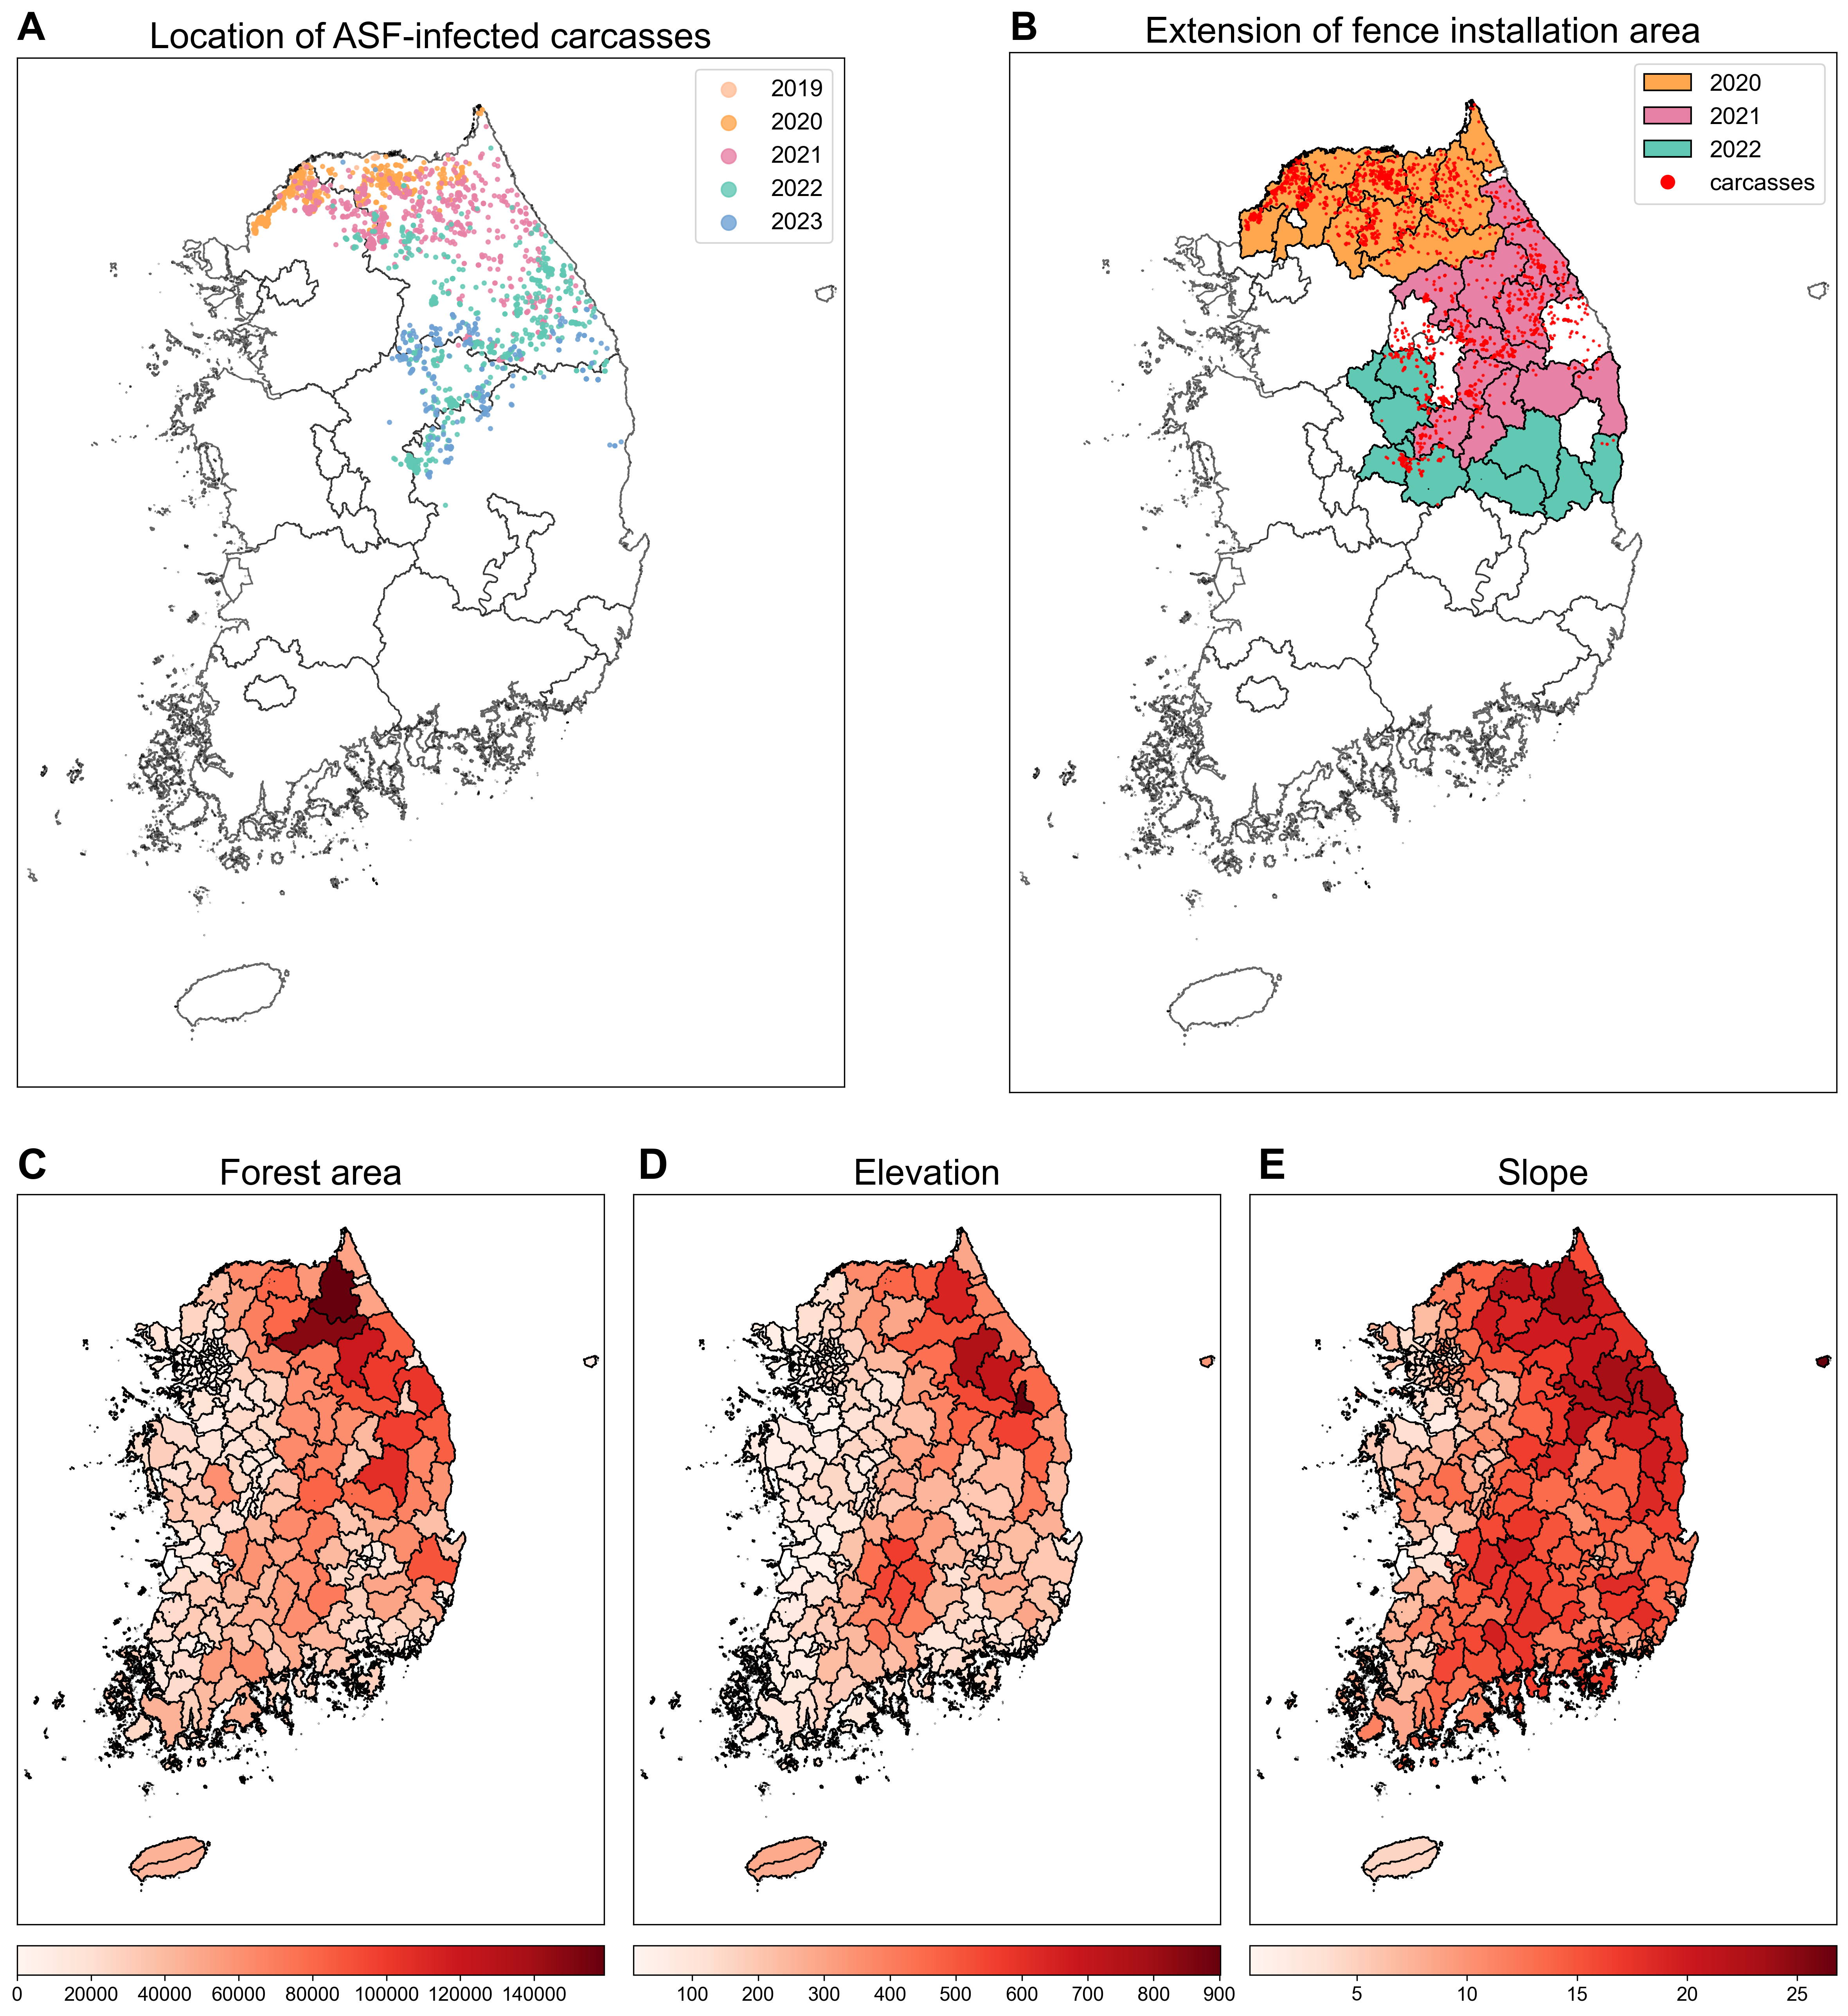

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import os

os.chdir("../Data")

plt.rcParams['font.family']='Arial'

bar_width=0.25
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=10) 
title_size = 22
label_size = 14
point_alpha = 0.8


# color setting
color_vs = ['#E881A6', '#6EA1D4']
color_year2 = ['#FFBE98', '#FFA74F', '#E881A6', '#60C8B3', '#6EA1D4']
color_year = ['#EFCFBA', '#FFB2A5', '#FA9A85',  '#DE8286', '#F97272']

set_dpi=300

location = pd.read_csv('ASF_WildBoar_Update.csv')
korea2 = gpd.read_file('ctprvn.shp')
korea2.crs = "EPSG:5179"
korea2 = korea2.to_crs(epsg=4326)

korea = gpd.read_file('sig_5179.shp')
korea = korea.to_crs(epsg=4326)

stage1 = ["파주시", "양주시", "연천군", "포천시", "가평군", "철원군", "춘천시", "화천군", "양구군", "인제군", "고성군",
          "양구군", "인제군", '홍천군']
stage2 = ["파주시", "양주시", "연천군", "포천시", "가평군", "춘천시", "화천군", "인제군", "양양군", "강릉시", "동해시",
          "평창군", "영월군", "정선군", "횡성군", "문경시", "단양군", "예천군", "영주시", "봉화군", "울진군"]
stage3 = ["음성군", "충주시", "괴산군", "보은군", "상주시", "의성군", "안동시", "청송군", "영덕군"]

korea['stage1'] = 0
korea['stage2'] = 0
korea['stage3'] = 0

special_index = 133

for idx, row in korea.iterrows():
    if row['SIG_KOR_NM'] in stage1:
        if row['SIG_KOR_NM'] == '고성군' and idx != special_index:
            continue
        korea.at[idx, 'stage1'] = 1
    if row['SIG_KOR_NM'] in stage2:
        if row['SIG_KOR_NM'] == '고성군' and idx != special_index:
            continue
        korea.at[idx, 'stage2'] = 1
    if row['SIG_KOR_NM'] in stage3:
        if row['SIG_KOR_NM'] == '고성군' and idx != special_index:
            continue
        korea.at[idx, 'stage3'] = 1

location.loc[location['경도'].str[-2] == '.','경도'] = 128.3489
location['위도'] = location['위도'].str.replace(',', '')
location['경도'] = location['경도'].astype(float)
location['위도'] = location['위도'].astype(float)

location['확진'] = pd.to_datetime(location['확진'], format = '%Y-%m-%d')
location = location.rename(columns = {'위도' : 'y', '경도' : 'x'}, inplace  = False)

location_2019 = location.query('확진 < "2020-01-01"')
location_2020 = location.query('확진 >= "2020-01-01" & 확진 < "2021-01-01"')
location_2021 = location.query('확진 >= "2021-01-01" & 확진 < "2022-01-01"')
location_2022 = location.query('확진 >= "2022-01-01" & 확진 < "2023-01-01"')
location_2023 = location.query('확진 >= "2023-01-01" & 확진 < "2024-01-01"')

korea3 = gpd.read_file("DEM.shp")
korea3.rename(columns = {'_mean':'dem'}, inplace = True)
slope = gpd.read_file("경사도.shp")
slope.rename(columns = {'_mean' : 'slope'}, inplace = True)


korea3 = korea3.merge(slope[['SIG_CD', 'slope']], on='SIG_CD', how='left')
area = pd.read_excel("forest_area.xlsx")
area.rename(columns = {'행정구역(2)' : 'SIG', '산림면적' : 'forest'}, inplace = True)
area['SIG_CD'] = area['SIG_CD'].astype(str)
korea3 = korea3.merge(area[['SIG_CD', 'forest_area', 'forest_ratio']], on = 'SIG_CD', how='left')
korea3 = korea3.to_crs(epsg=4326)

fig = plt.figure(figsize=(20, 24), dpi=set_dpi)

gs1_nrows = 1
gs1_ncols = 2
gs1 = fig.add_gridspec(gs1_nrows, gs1_ncols, bottom = 0.2, top = 1)

ax4 = fig.add_subplot(gs1[0, 0])
ax5 = fig.add_subplot(gs1[0, 1])

ax4.set_title('Location of ASF-infected carcasses', fontsize=title_size)
korea2.plot(ax=ax4, color='white', edgecolor='black', alpha=0.6)
ax4.scatter(location_2019['x'], location_2019['y'], s=5, color=color_year2[0], alpha=point_alpha, label='2019')
ax4.scatter(location_2020['x'], location_2020['y'], s=5, color=color_year2[1], alpha=point_alpha, label='2020')
ax4.scatter(location_2021['x'], location_2021['y'], s=5, color=color_year2[2], alpha=point_alpha, label='2021')
ax4.scatter(location_2022['x'], location_2022['y'], s=5, color=color_year2[3], alpha=point_alpha, label='2022')
ax4.scatter(location_2023['x'], location_2023['y'], s=5, color=color_year2[4], alpha=point_alpha, label='2023')


ax4.set_xlim([125, 131])
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax4.legend(fontsize='x-large', markerscale=4)
ax4.text(0, 1.045, 'A', transform=ax4.transAxes, fontsize=24, fontweight='bold', va='top', ha='left')

ax5.set_title('Extension of fence installation area', fontsize=title_size)
korea2.plot(ax = ax5, color = 'white', edgecolor = 'black', alpha = 0.6)
korea[korea['stage2'] == 1].plot(ax=ax5, color=color_year2[2], edgecolor='black')
korea[korea['stage1'] == 1].plot(ax=ax5, color=color_year2[1], edgecolor='black')
korea[korea['stage3'] == 1].plot(ax=ax5, color=color_year2[3], edgecolor='black')

ax5.scatter(location_2019['x'], location_2019['y'], s=1, color='red', alpha=point_alpha, label='2019')
ax5.scatter(location_2020['x'], location_2020['y'], s=1, color='red', alpha=point_alpha, label='2020')
ax5.scatter(location_2021['x'], location_2021['y'], s=1, color='red', alpha=point_alpha, label='2021')
ax5.scatter(location_2022['x'], location_2022['y'], s=1, color='red', alpha=point_alpha, label='2022')
ax5.scatter(location_2023['x'], location_2023['y'], s=1, color='red', alpha=point_alpha, label='2023')

legend_elements = [
    Patch(facecolor=color_year2[1], edgecolor='black', label='2020'),
    Patch(facecolor=color_year2[2], edgecolor='black', label='2021'),
    Patch(facecolor=color_year2[3], edgecolor='black', label='2022'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='carcasses')
]

ax5.legend(fontsize='x-large',handles=legend_elements, loc='upper right')

ax5.set_xlim([125, 131])
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_xticklabels([])
ax5.set_yticklabels([])
ax5.text(1.2, 1.045, 'B', transform=ax4.transAxes, fontsize=24, fontweight='bold', va='top', ha='left')

gs2_nrows = 1
gs2_ncols = 3
gs2 = fig.add_gridspec(gs2_nrows, gs2_ncols, bottom = 0, top = 0.75, wspace=0.05)

ax1 = fig.add_subplot(gs2[0, 0])
ax2 = fig.add_subplot(gs2[0, 1])
ax3 = fig.add_subplot(gs2[0, 2])

ax1.text(0, -0.06, 'C', transform=ax4.transAxes, fontsize=26, fontweight='bold', va='top', ha='left')
ax1.set_title('Forest area', fontsize=title_size)
korea3.plot(column='forest_area', ax=ax1, legend=False, cmap='Reds', edgecolor='black')
ax1.set_xlim([125, 131])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=korea3['forest_area'].min(), vmax=korea3['forest_area'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax1, shrink=1, orientation='horizontal', pad=0.01)
ax1.set_xticks([])
ax1.set_yticks([])

ax2.text(0.75, -0.06, 'D', transform=ax4.transAxes, fontsize=26, fontweight='bold', va='top', ha='left')
ax2.set_title('Elevation', fontsize=title_size)
korea3.plot(column='dem', ax=ax2, legend=False, cmap='Reds', edgecolor='black')
ax2.set_xlim([125, 131])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=korea3['dem'].min(), vmax=korea3['dem'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax2, shrink=1, orientation='horizontal', pad=0.01)
ax2.set_xticks([])
ax2.set_yticks([])


ax3.text(1.5, -0.06, 'E', transform=ax4.transAxes, fontsize=26, fontweight='bold', va='top', ha='left')
ax3.set_title('Slope', fontsize=title_size)
korea3.plot(column='slope', ax=ax3, legend=False, cmap='Reds', edgecolor='black')
ax3.set_xlim([125, 131])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=korea3['slope'].min(), vmax=korea3['slope'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax3, shrink=1, orientation='horizontal', pad=0.01)
ax3.set_xticks([])
ax3.set_yticks([])

plt.show()

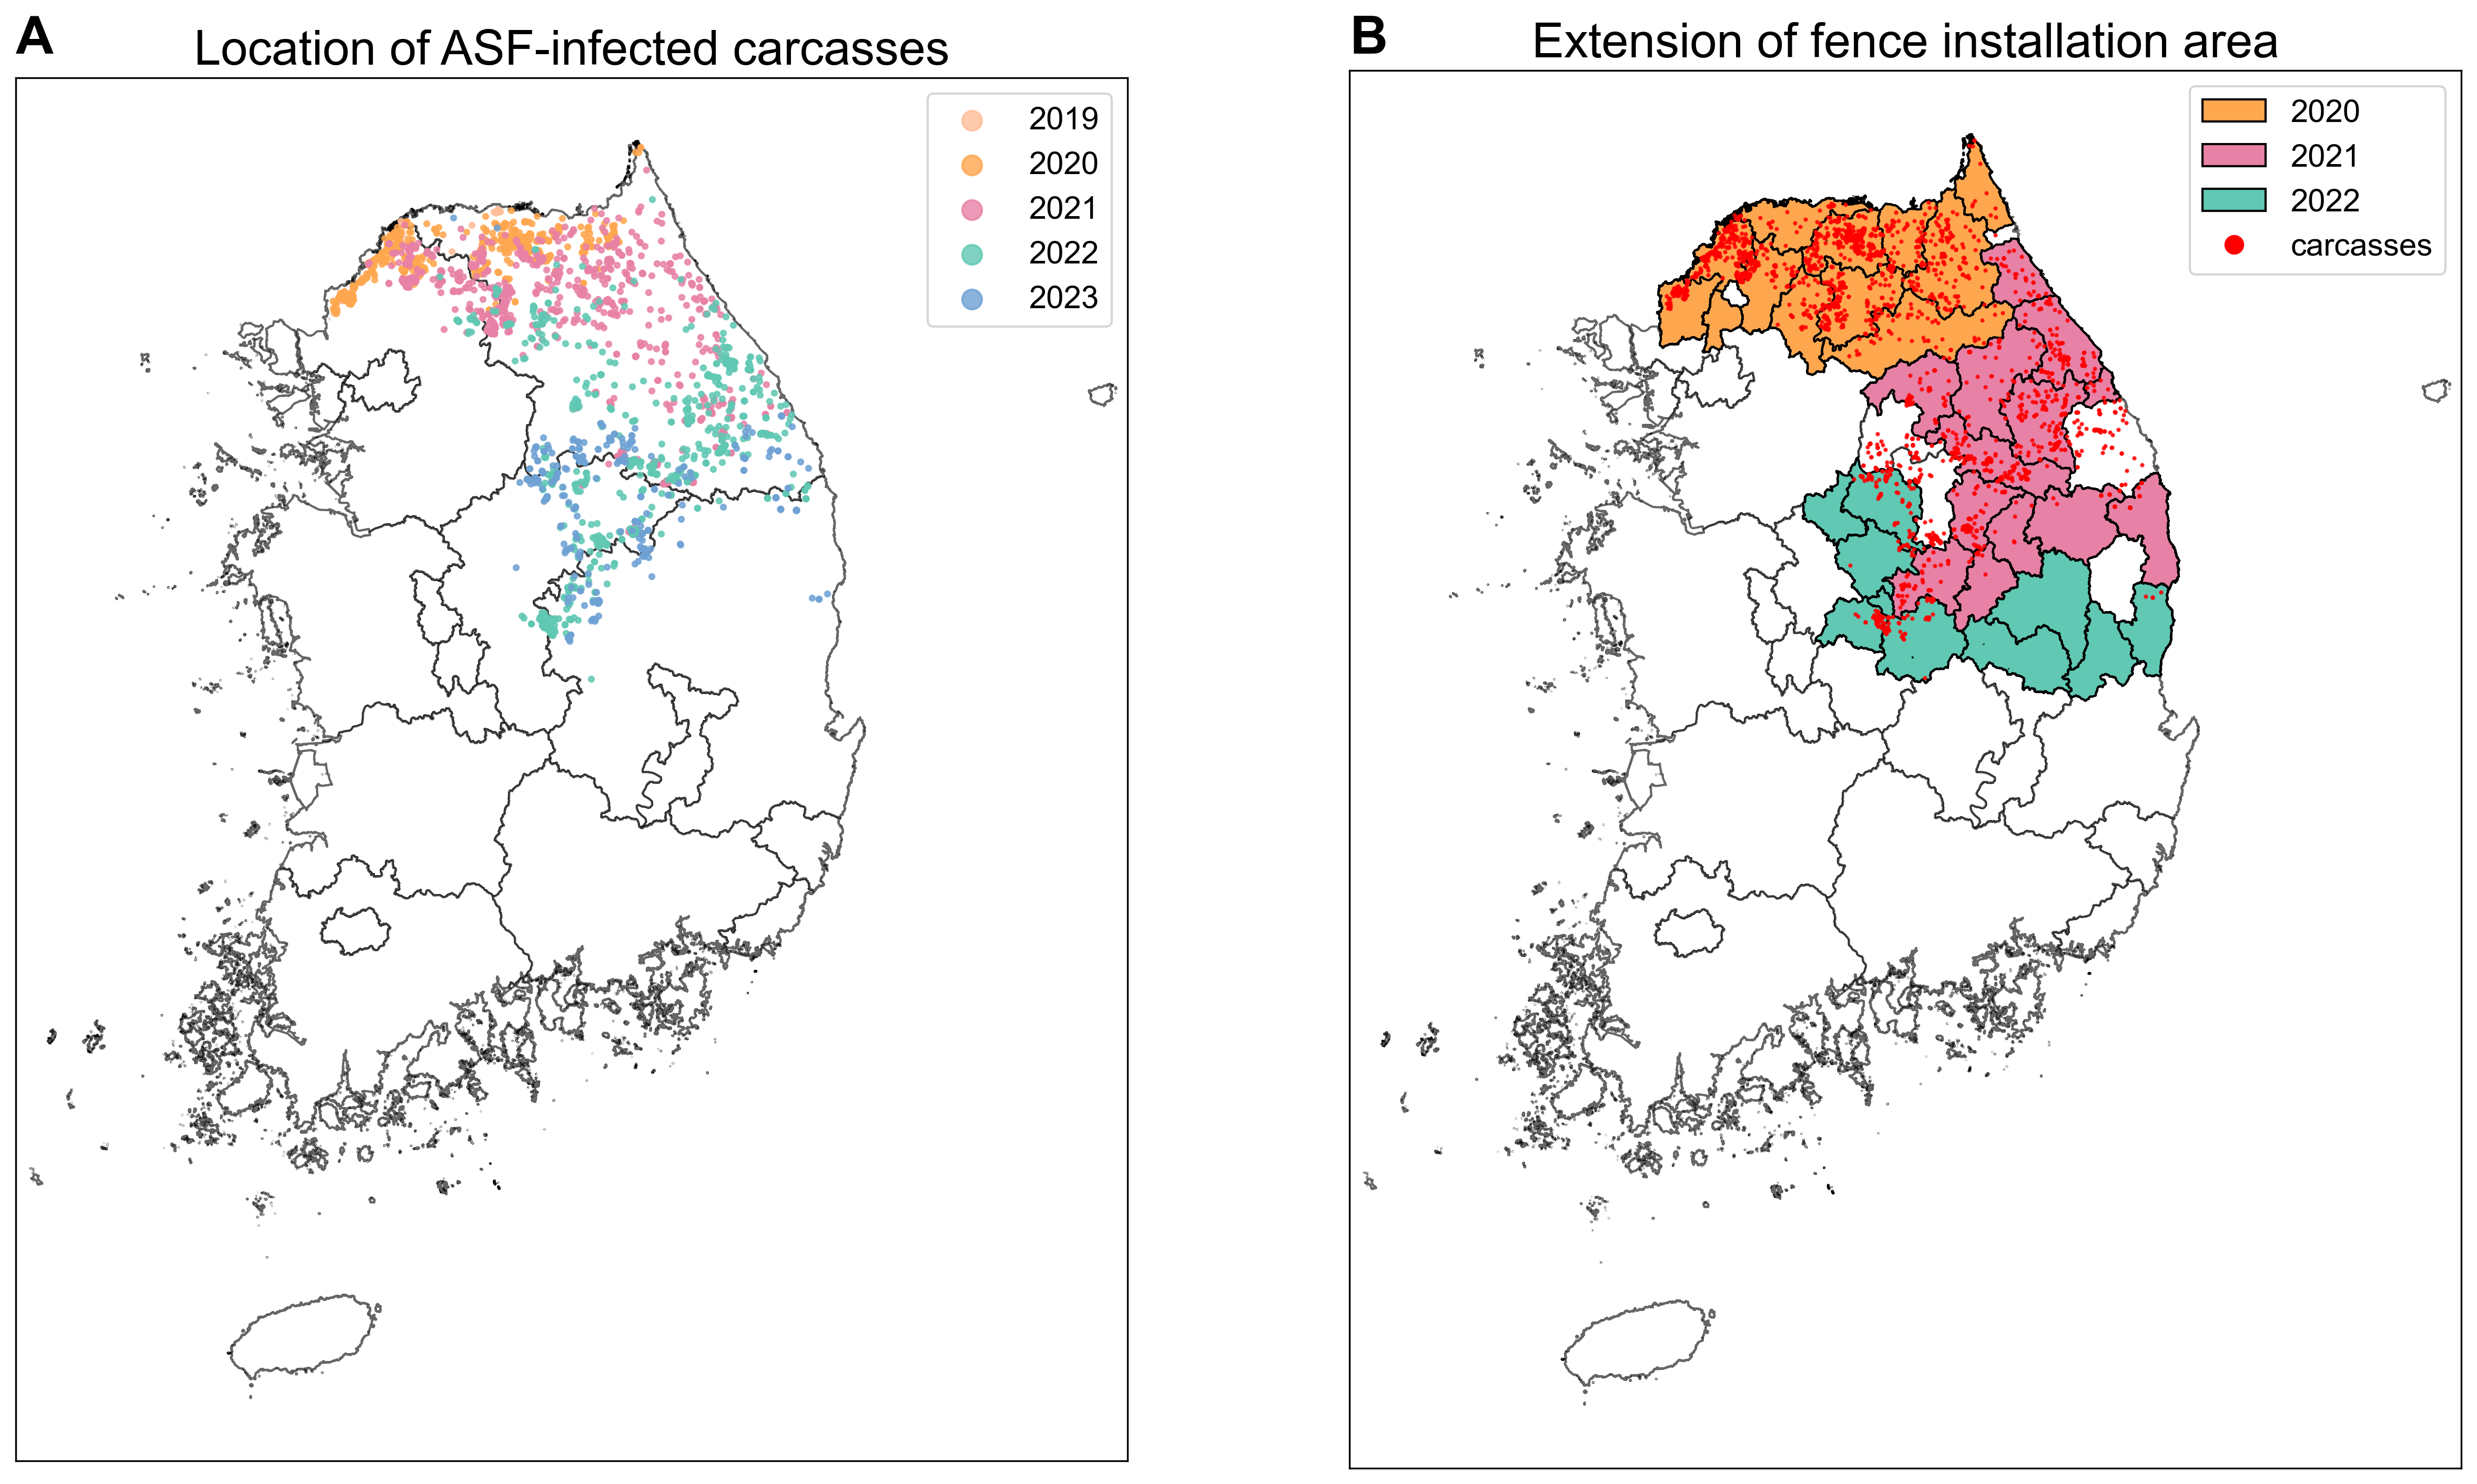

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import os

os.chdir("../Data")

plt.rcParams['font.family']='Arial'

bar_width=0.25
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=10) 
title_size = 22
label_size = 14
point_alpha = 0.8


# color setting
color_vs = ['#E881A6', '#6EA1D4']
color_year2 = ['#FFBE98', '#FFA74F', '#E881A6', '#60C8B3', '#6EA1D4']
color_year = ['#EFCFBA', '#FFB2A5', '#FA9A85',  '#DE8286', '#F97272']

set_dpi=300

location = pd.read_csv('ASF_WildBoar_Update.csv')
korea2 = gpd.read_file('ctprvn.shp')
korea2.crs = "EPSG:5179"
korea2 = korea2.to_crs(epsg=4326)

korea = gpd.read_file('sig_5179.shp')
korea = korea.to_crs(epsg=4326)

stage1 = ["파주시", "양주시", "연천군", "포천시", "가평군", "철원군", "춘천시", "화천군", "양구군", "인제군", "고성군",
          "양구군", "인제군", '홍천군']
stage2 = ["파주시", "양주시", "연천군", "포천시", "가평군", "춘천시", "화천군", "인제군", "양양군", "강릉시", "동해시",
          "평창군", "영월군", "정선군", "횡성군", "문경시", "단양군", "예천군", "영주시", "봉화군", "울진군"]
stage3 = ["음성군", "충주시", "괴산군", "보은군", "상주시", "의성군", "안동시", "청송군", "영덕군"]

korea['stage1'] = 0
korea['stage2'] = 0
korea['stage3'] = 0

special_index = 133

for idx, row in korea.iterrows():
    if row['SIG_KOR_NM'] in stage1:
        if row['SIG_KOR_NM'] == '고성군' and idx != special_index:
            continue
        korea.at[idx, 'stage1'] = 1
    if row['SIG_KOR_NM'] in stage2:
        if row['SIG_KOR_NM'] == '고성군' and idx != special_index:
            continue
        korea.at[idx, 'stage2'] = 1
    if row['SIG_KOR_NM'] in stage3:
        if row['SIG_KOR_NM'] == '고성군' and idx != special_index:
            continue
        korea.at[idx, 'stage3'] = 1

location.loc[location['경도'].str[-2] == '.','경도'] = 128.3489
location['위도'] = location['위도'].str.replace(',', '')
location['경도'] = location['경도'].astype(float)
location['위도'] = location['위도'].astype(float)

location['확진'] = pd.to_datetime(location['확진'], format = '%Y-%m-%d')
location = location.rename(columns = {'위도' : 'y', '경도' : 'x'}, inplace  = False)

location_2019 = location.query('확진 < "2020-01-01"')
location_2020 = location.query('확진 >= "2020-01-01" & 확진 < "2021-01-01"')
location_2021 = location.query('확진 >= "2021-01-01" & 확진 < "2022-01-01"')
location_2022 = location.query('확진 >= "2022-01-01" & 확진 < "2023-01-01"')
location_2023 = location.query('확진 >= "2023-01-01" & 확진 < "2024-01-01"')

korea3 = gpd.read_file("DEM.shp")
korea3.rename(columns = {'_mean':'dem'}, inplace = True)
slope = gpd.read_file("경사도.shp")
slope.rename(columns = {'_mean' : 'slope'}, inplace = True)


korea3 = korea3.merge(slope[['SIG_CD', 'slope']], on='SIG_CD', how='left')
area = pd.read_excel("forest_area.xlsx")
area.rename(columns = {'행정구역(2)' : 'SIG', '산림면적' : 'forest'}, inplace = True)
area['SIG_CD'] = area['SIG_CD'].astype(str)
korea3 = korea3.merge(area[['SIG_CD', 'forest_area', 'forest_ratio']], on = 'SIG_CD', how='left')
korea3 = korea3.to_crs(epsg=4326)

fig = plt.figure(figsize=(20, 24), dpi=set_dpi)

gs1_nrows = 1
gs1_ncols = 2
gs1 = fig.add_gridspec(gs1_nrows, gs1_ncols, bottom = 0.2, top = 1)

ax4 = fig.add_subplot(gs1[0, 0])
ax5 = fig.add_subplot(gs1[0, 1])

ax4.set_title('Location of ASF-infected carcasses', fontsize=title_size)
korea2.plot(ax=ax4, color='white', edgecolor='black', alpha=0.6)
ax4.scatter(location_2019['x'], location_2019['y'], s=5, color=color_year2[0], alpha=point_alpha, label='2019')
ax4.scatter(location_2020['x'], location_2020['y'], s=5, color=color_year2[1], alpha=point_alpha, label='2020')
ax4.scatter(location_2021['x'], location_2021['y'], s=5, color=color_year2[2], alpha=point_alpha, label='2021')
ax4.scatter(location_2022['x'], location_2022['y'], s=5, color=color_year2[3], alpha=point_alpha, label='2022')
ax4.scatter(location_2023['x'], location_2023['y'], s=5, color=color_year2[4], alpha=point_alpha, label='2023')


ax4.set_xlim([125, 131])
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax4.legend(fontsize='x-large', markerscale=4)
ax4.text(0, 1.045, 'A', transform=ax4.transAxes, fontsize=24, fontweight='bold', va='top', ha='left')

ax5.set_title('Extension of fence installation area', fontsize=title_size)
korea2.plot(ax = ax5, color = 'white', edgecolor = 'black', alpha = 0.6)
korea[korea['stage2'] == 1].plot(ax=ax5, color=color_year2[2], edgecolor='black')
korea[korea['stage1'] == 1].plot(ax=ax5, color=color_year2[1], edgecolor='black')
korea[korea['stage3'] == 1].plot(ax=ax5, color=color_year2[3], edgecolor='black')

ax5.scatter(location_2019['x'], location_2019['y'], s=1, color='red', alpha=point_alpha, label='2019')
ax5.scatter(location_2020['x'], location_2020['y'], s=1, color='red', alpha=point_alpha, label='2020')
ax5.scatter(location_2021['x'], location_2021['y'], s=1, color='red', alpha=point_alpha, label='2021')
ax5.scatter(location_2022['x'], location_2022['y'], s=1, color='red', alpha=point_alpha, label='2022')
ax5.scatter(location_2023['x'], location_2023['y'], s=1, color='red', alpha=point_alpha, label='2023')

legend_elements = [
    Patch(facecolor=color_year2[1], edgecolor='black', label='2020'),
    Patch(facecolor=color_year2[2], edgecolor='black', label='2021'),
    Patch(facecolor=color_year2[3], edgecolor='black', label='2022'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='carcasses')
]

ax5.legend(fontsize='x-large',handles=legend_elements, loc='upper right')

ax5.set_xlim([125, 131])
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_xticklabels([])
ax5.set_yticklabels([])
ax5.text(1.2, 1.045, 'B', transform=ax4.transAxes, fontsize=24, fontweight='bold', va='top', ha='left')

plt.show()